## Disease Symptoms and Patient Profile Project

In this project we are going to study the connection between the symptoms and medical history of patients to some diseases.
<br>The file we have available is in csv format and we are going to read it, right after doing some essential imports for the project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from colorama import Fore
from colorama import Style

import warnings
warnings.filterwarnings('ignore')

The dataset was available on Kaggle at the following link: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning/data.
<br>The Complete Dataset consists of 2 CSV files . One of them is training and other is for testing your model.
<br>The training set contains records about 4920 patients, one for each row, and it has 133 columns.
<br>The columns of the dataset represent the different symptoms that the patients experienced, except for the last column, 'prognosis', represents the disease that the patients were diagnosed with.

### The dataset
Let us load the dataset and preview the DataFrame for the Train set.
#### The Train

In [2]:
df=pd.read_csv('Dataset/Training.csv')

In [3]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


Let us check if any of the values are null:

In [4]:
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

The "Unnamed" column has only Nan values so we can drop it.

In [5]:
df.drop(columns=['Unnamed: 133'], inplace=True)

Moving to the front the most interesting column, `prognosis`:

In [6]:
df.insert(0, 'prognosis', df.pop('prognosis'))

In [7]:
df

,prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,0,0,0


Let us now explore a little more about this dataset:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, prognosis to yellow_crust_ooze
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


We have 4920 entries, definitely a more rich dataset.
<br>Except for 'prognosis', each other column is a symptom.
From the columns we saw that the different symptoms are already one hot encoded.
<br>Let us study a little more the distribution of the diseases.

In [9]:
df['prognosis'].value_counts()

Pneumonia                                  120
Malaria                                    120
Psoriasis                                  120
Typhoid                                    120
Hyperthyroidism                            120
Jaundice                                   120
Dimorphic hemmorhoids(piles)               120
Tuberculosis                               120
Alcoholic hepatitis                        120
Hepatitis C                                120
Bronchial Asthma                           120
hepatitis A                                120
Common Cold                                120
Cervical spondylosis                       120
Osteoarthristis                            120
GERD                                       120
Acne                                       120
Dengue                                     120
Drug Reaction                              120
Arthritis                                  120
Heart attack                               120
Hypothyroidis

Wonderful! As we can see for every disease there are 120 cases. <br>This is great because it's a high enough number that we can expect the model to be able to learn some patterns, and it's also great because it means the classes are already balanced, there aren't diseases that are more or less represented.
<br>Without having to count manually, let us see how many unique diseases there are:

In [10]:
# counting unique values
n = len(pd.unique(df['prognosis']))
 
print("No.of.unique values :", 
      n)

No.of.unique values : 41


<br>Ok so we have 41 illnesses, and they are all represented equally in the dataframe.
<br>Let us now take a look at how the symptoms are distributed, first previewing the counts of values.
This is expressed in each column with how many 0, which are the patients that didn't experience the symptom, and how many 1, which are the patients that did experience the symptom.

In [11]:
df_sympt=df.drop("prognosis", axis='columns')
for i in df_sympt.columns:
    print(df[i].value_counts(normalize=True))
    print("\n")

0    0.862195
1    0.137805
Name: itching, dtype: float64


0    0.840244
1    0.159756
Name: skin_rash, dtype: float64


0    0.978049
1    0.021951
Name: nodal_skin_eruptions, dtype: float64


0    0.954878
1    0.045122
Name: continuous_sneezing, dtype: float64


0    0.978049
1    0.021951
Name: shivering, dtype: float64


0    0.837805
1    0.162195
Name: chills, dtype: float64


0    0.860976
1    0.139024
Name: joint_pain, dtype: float64


0    0.954878
1    0.045122
Name: stomach_pain, dtype: float64


0    0.954878
1    0.045122
Name: acidity, dtype: float64


0    0.978049
1    0.021951
Name: ulcers_on_tongue, dtype: float64


0    0.978049
1    0.021951
Name: muscle_wasting, dtype: float64


0    0.610976
1    0.389024
Name: vomiting, dtype: float64


0    0.956098
1    0.043902
Name: burning_micturition, dtype: float64


0    0.978049
1    0.021951
Name: spotting_ urination, dtype: float64


0    0.607317
1    0.392683
Name: fatigue, dtype: float64


0    0.976829
1    0.02

0    0.976829
1    0.023171
Name: red_sore_around_nose, dtype: float64


0    0.976829
1    0.023171
Name: yellow_crust_ooze, dtype: float64




Next we are plotting these values as bar graphs:

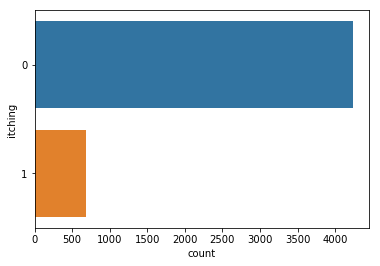

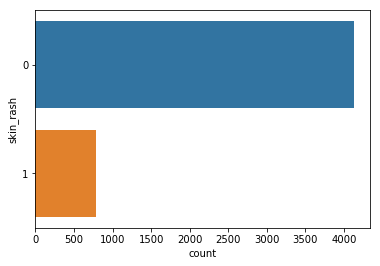

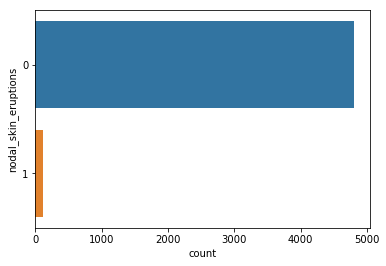

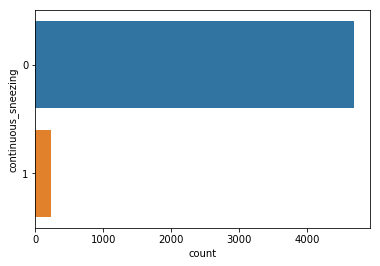

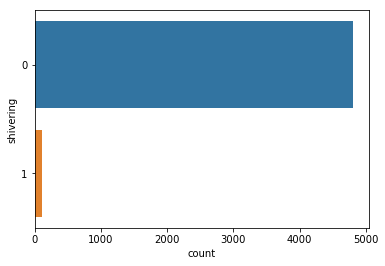

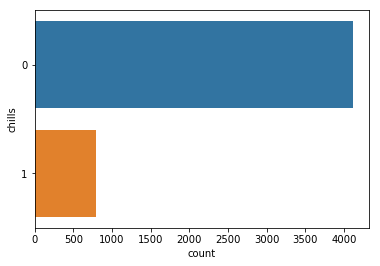

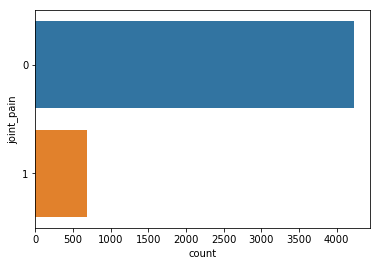

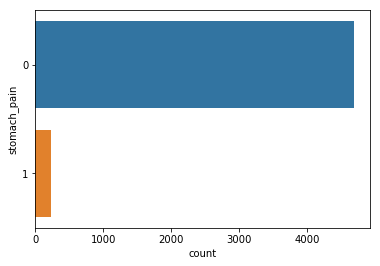

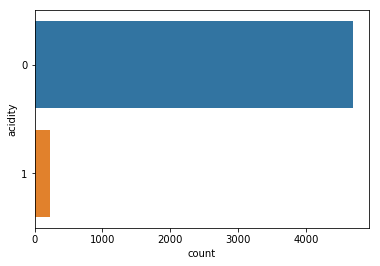

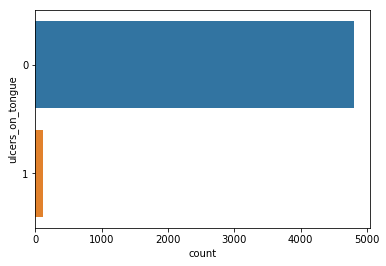

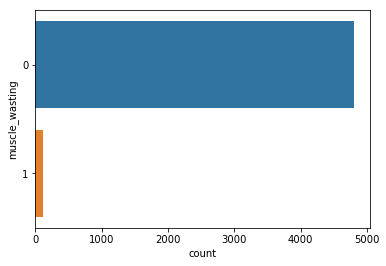

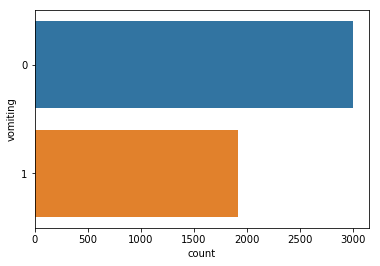

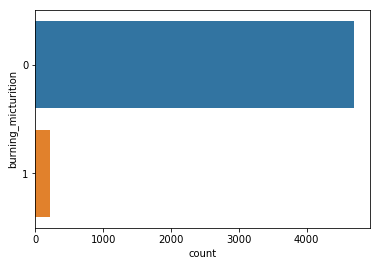

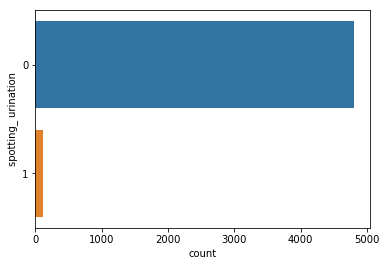

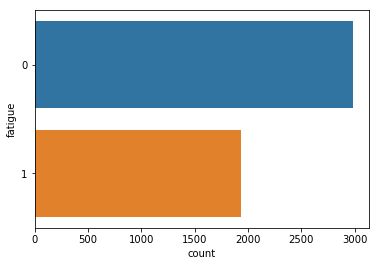

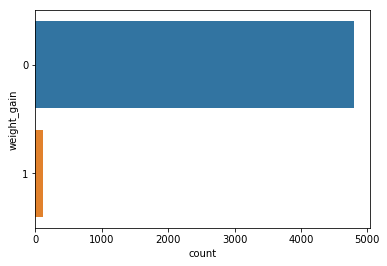

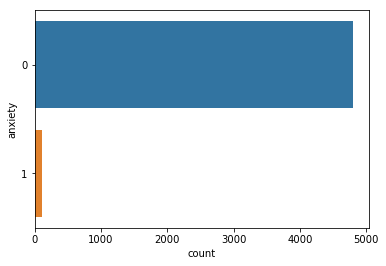

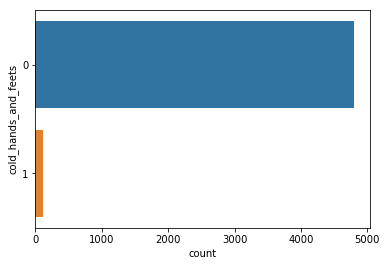

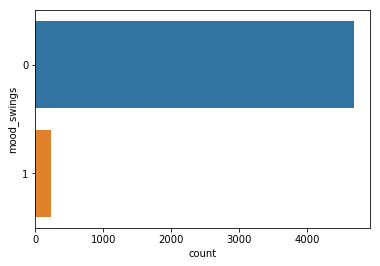

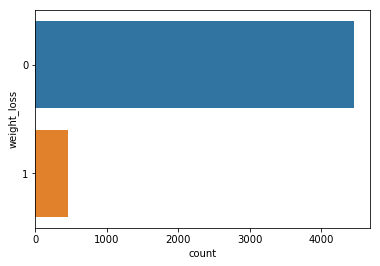

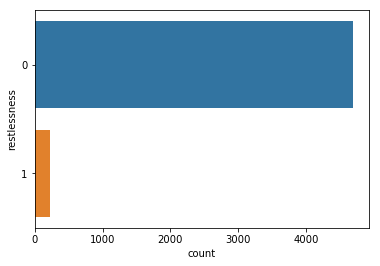

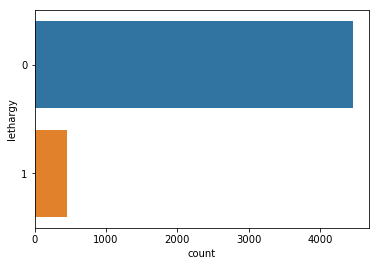

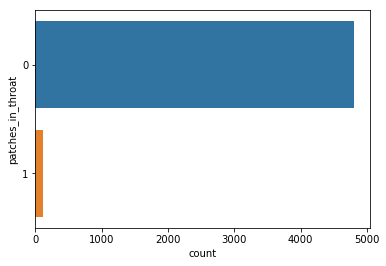

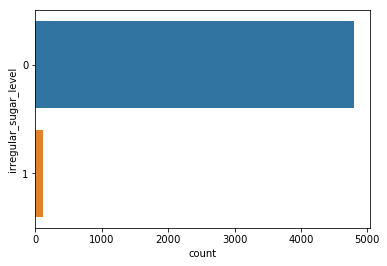

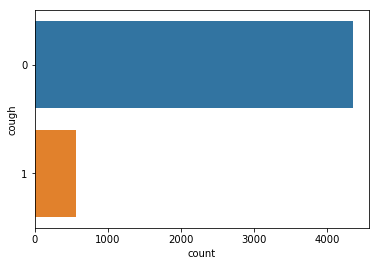

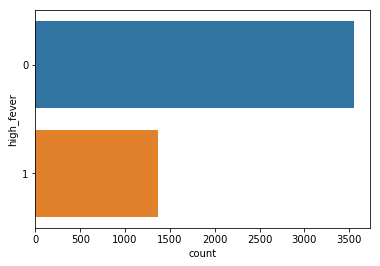

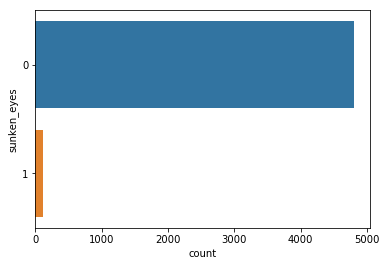

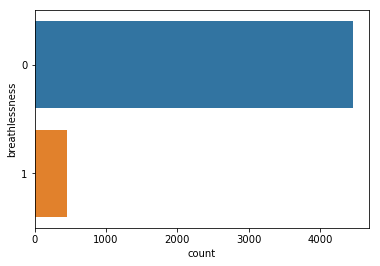

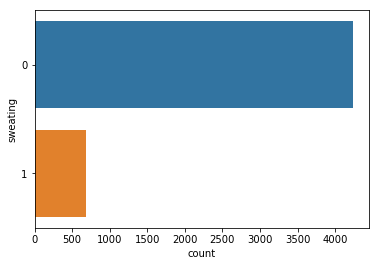

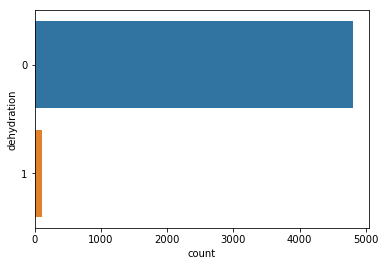

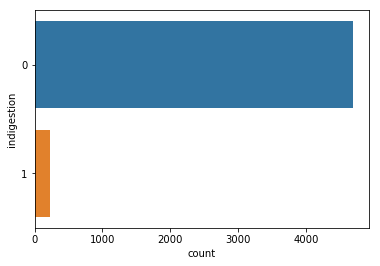

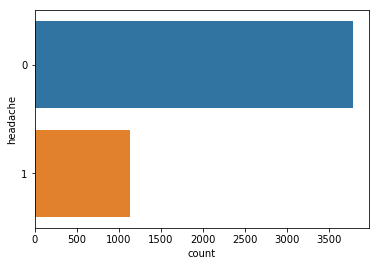

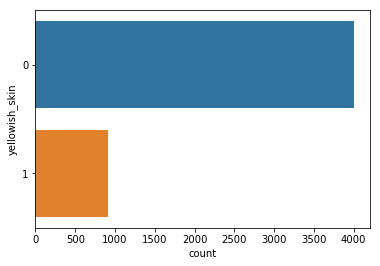

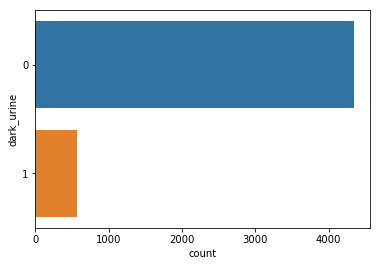

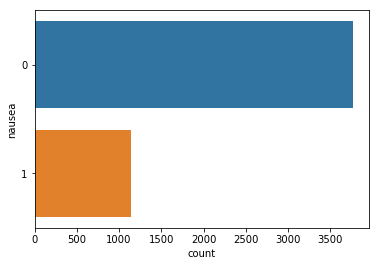

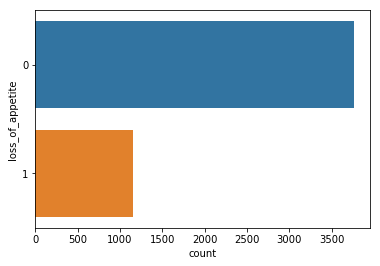

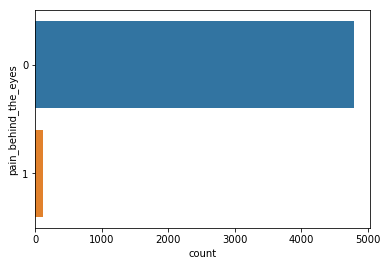

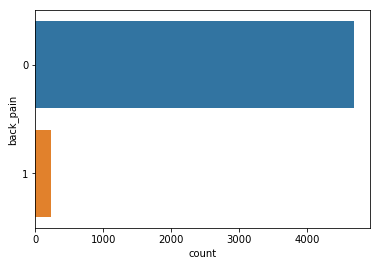

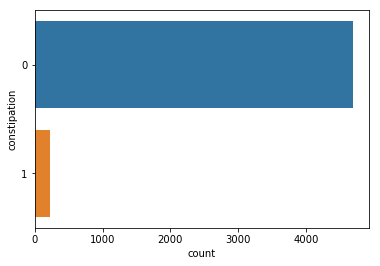

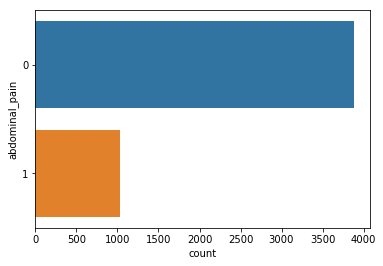

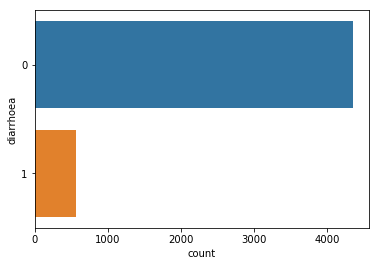

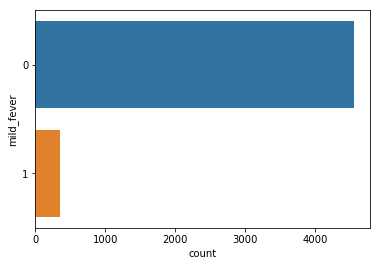

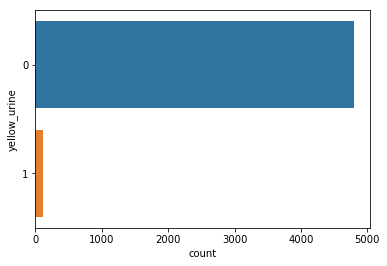

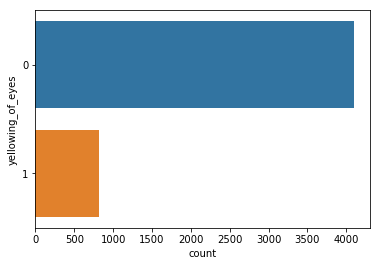

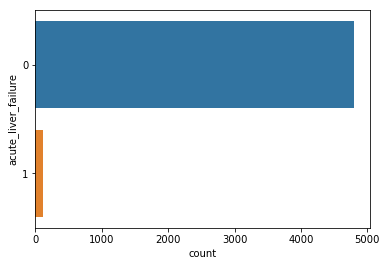

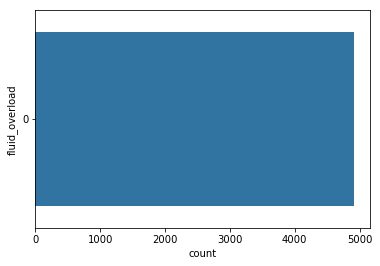

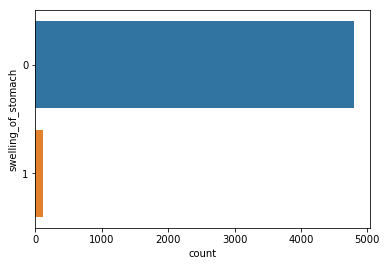

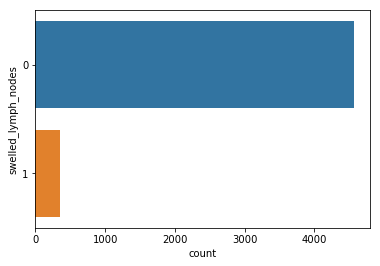

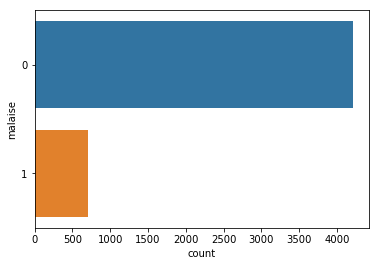

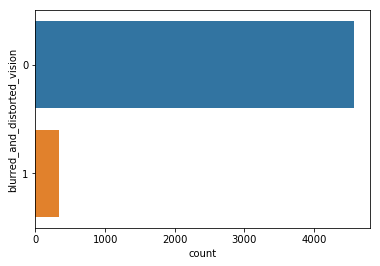

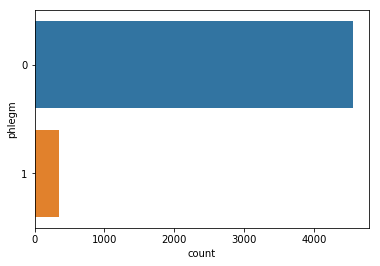

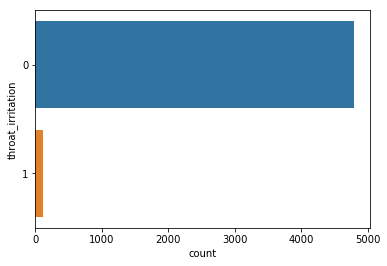

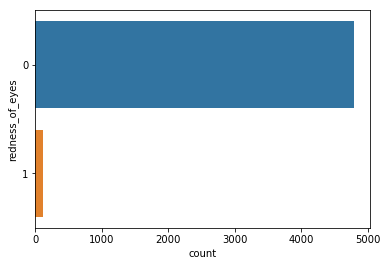

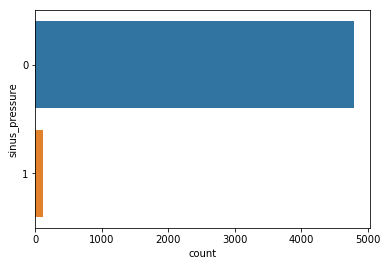

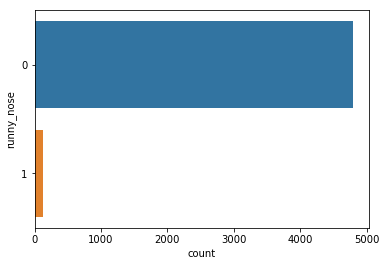

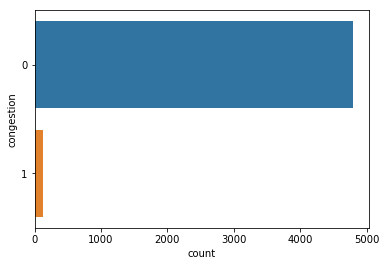

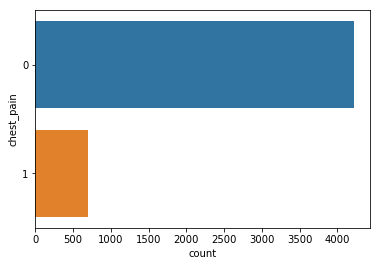

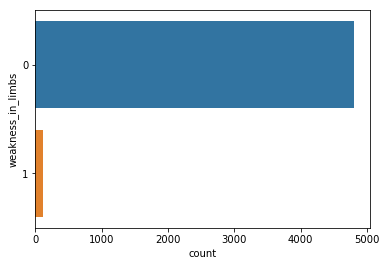

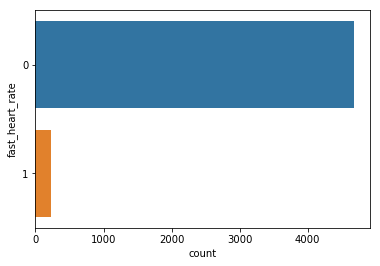

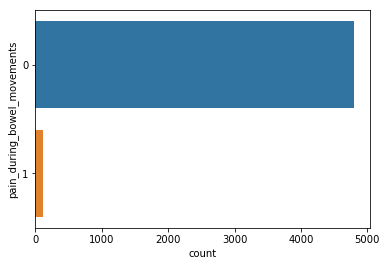

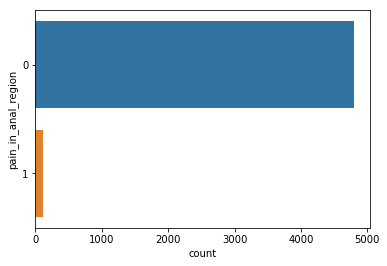

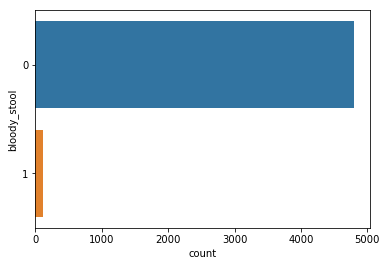

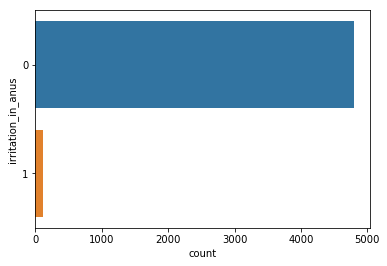

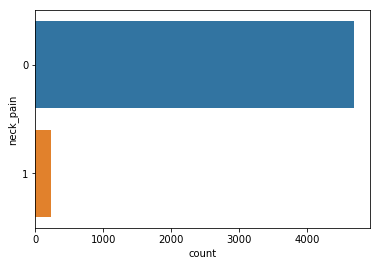

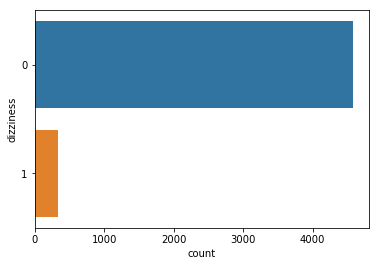

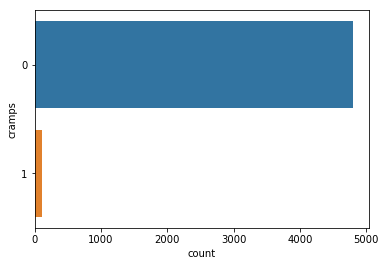

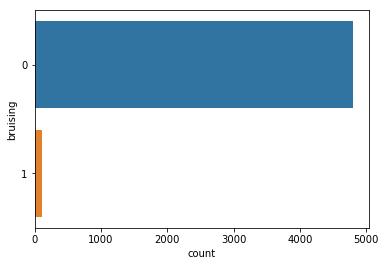

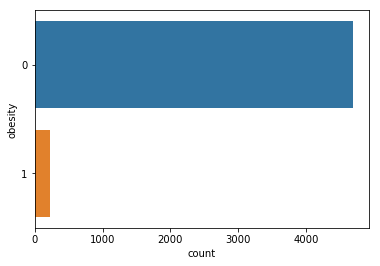

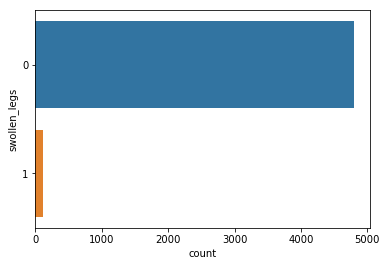

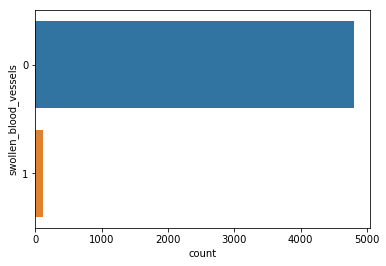

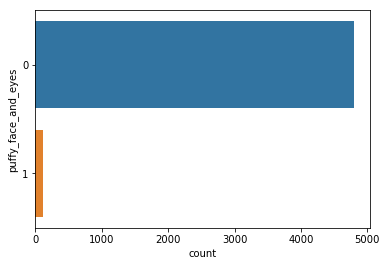

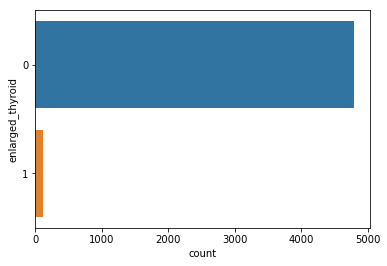

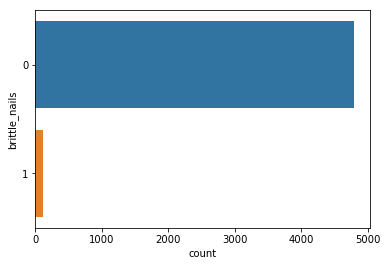

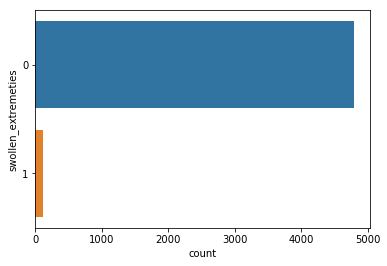

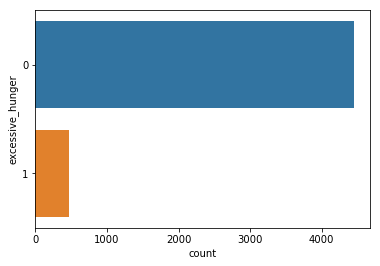

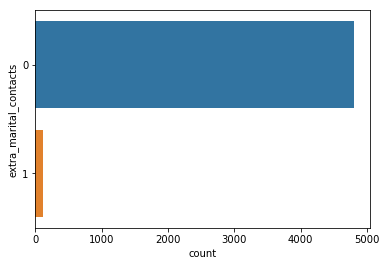

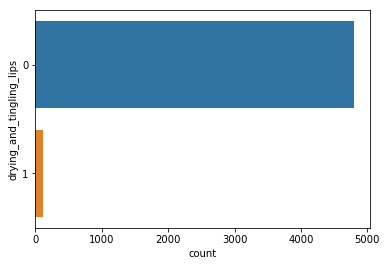

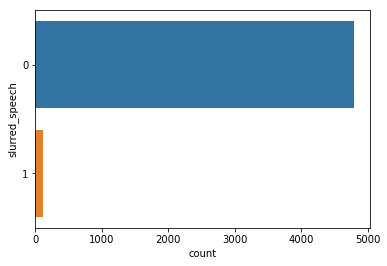

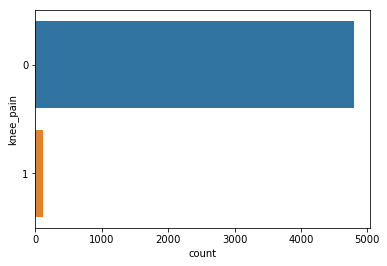

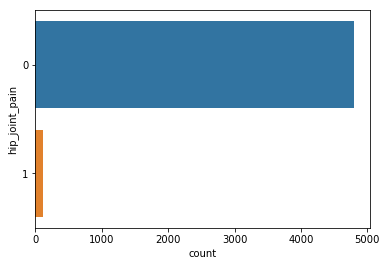

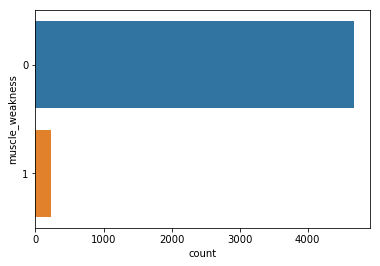

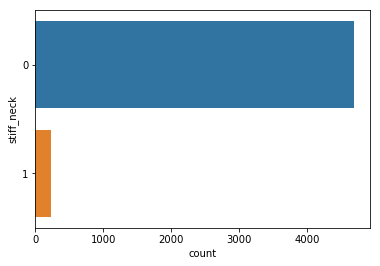

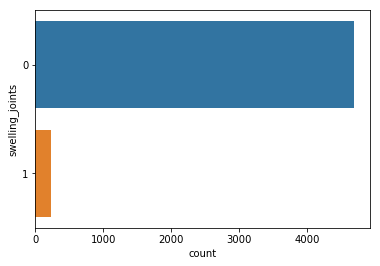

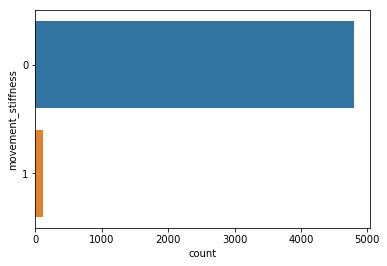

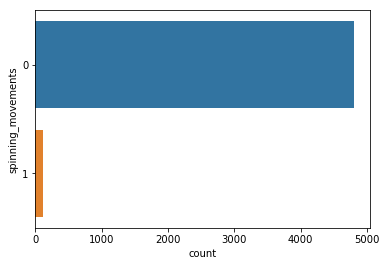

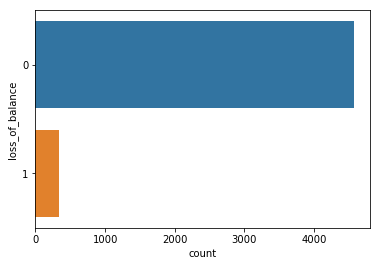

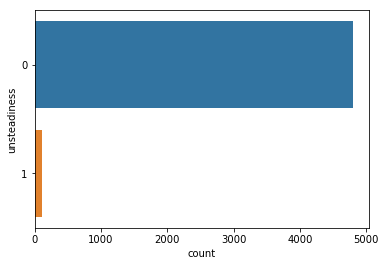

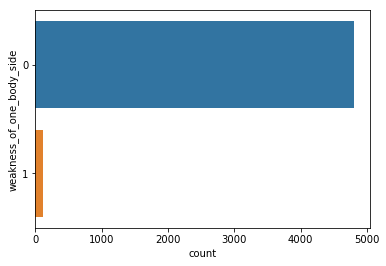

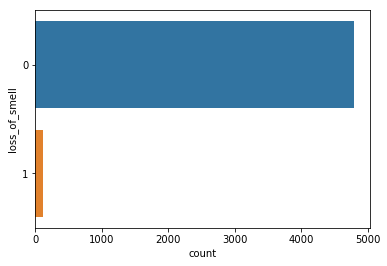

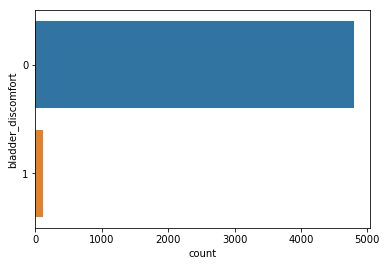

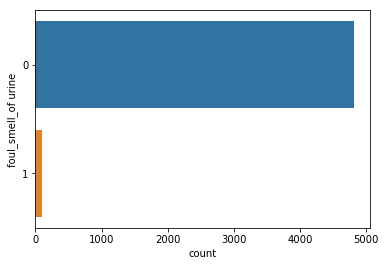

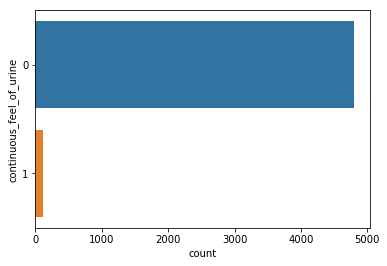

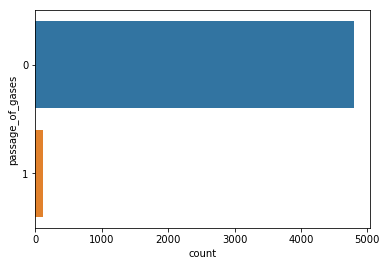

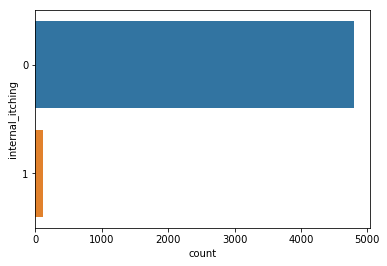

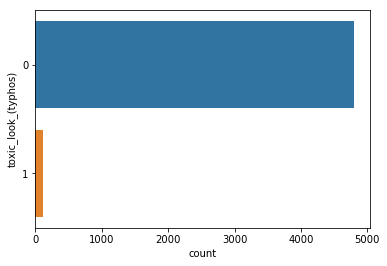

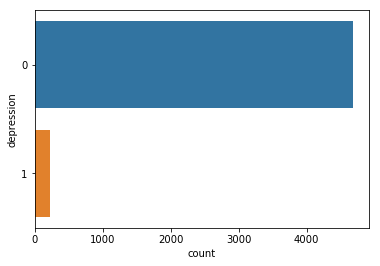

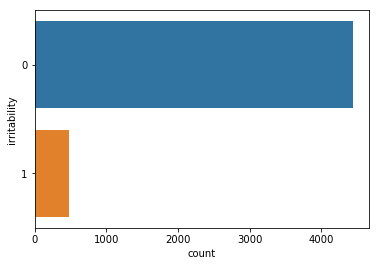

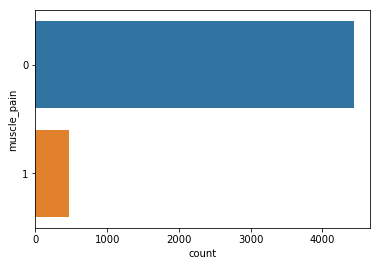

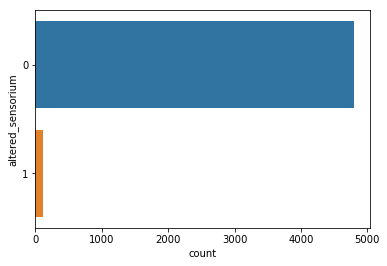

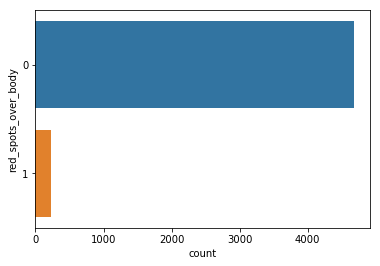

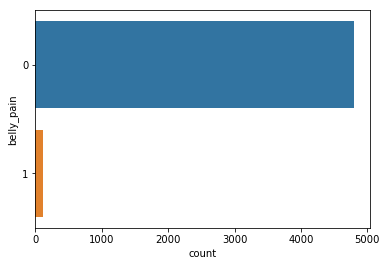

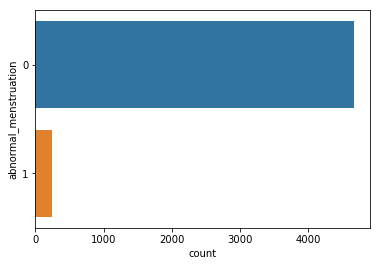

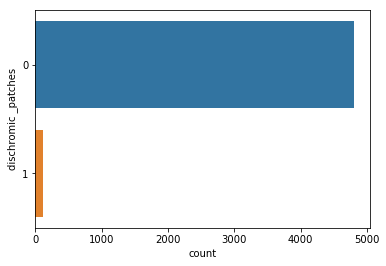

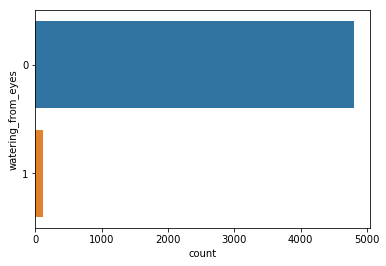

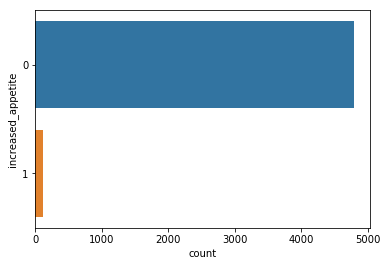

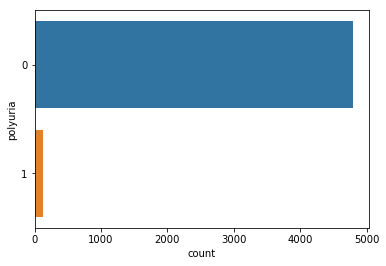

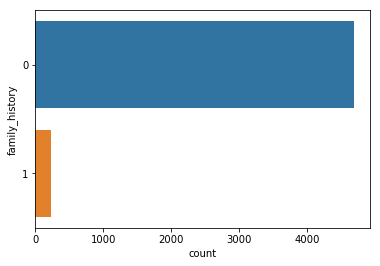

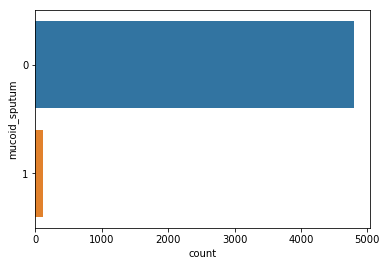

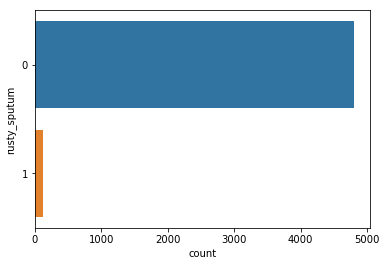

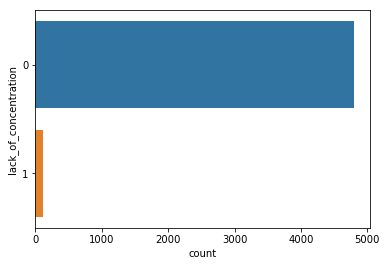

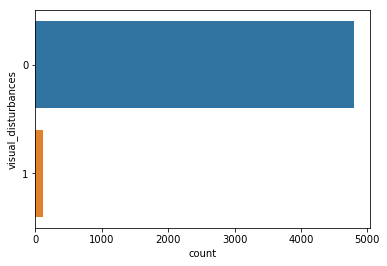

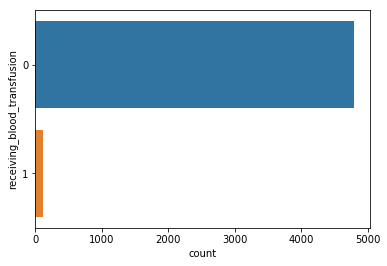

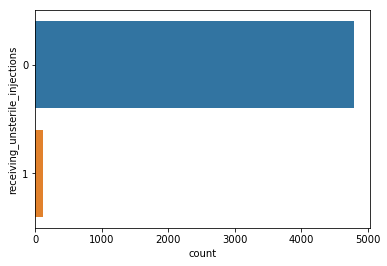

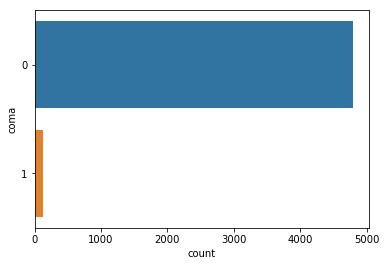

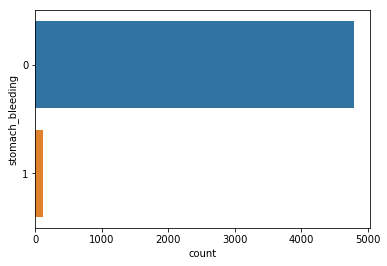

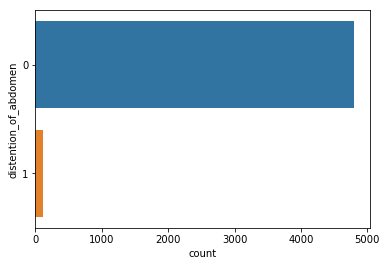

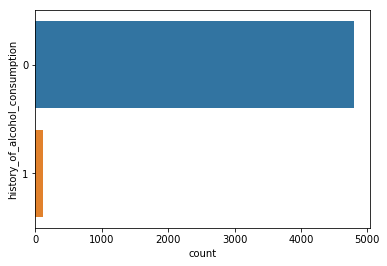

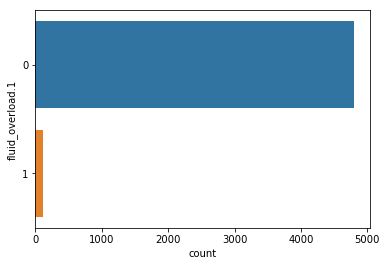

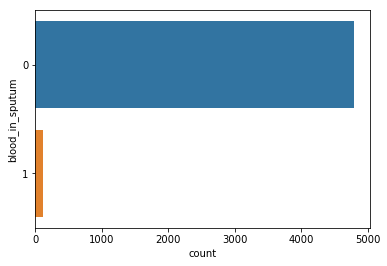

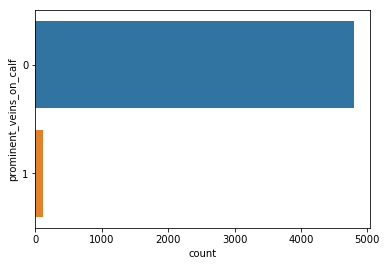

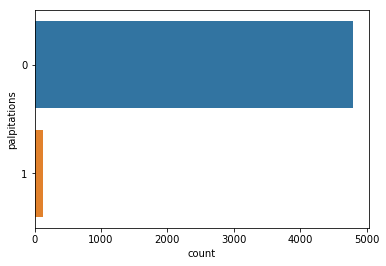

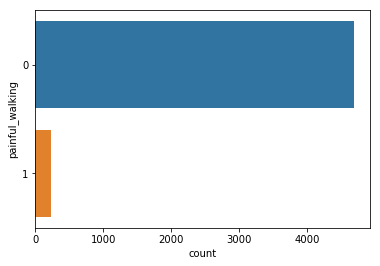

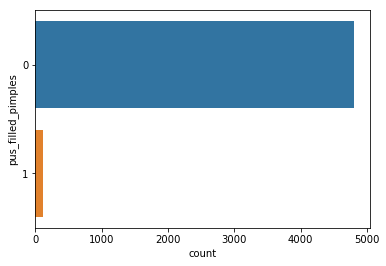

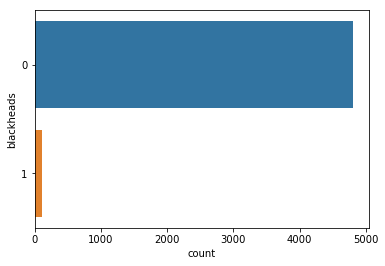

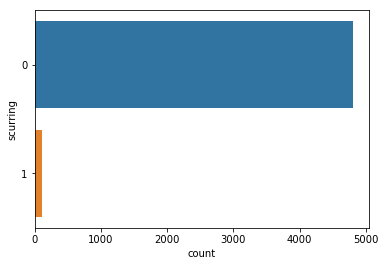

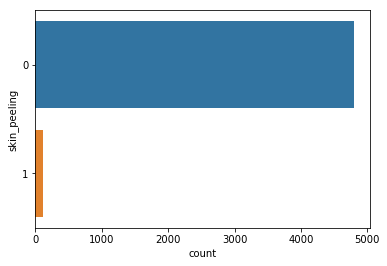

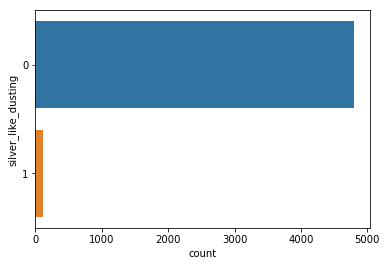

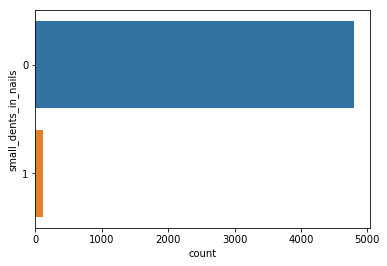

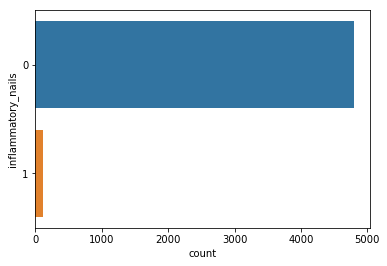

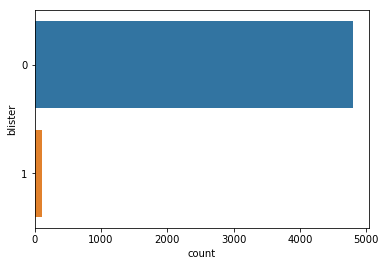

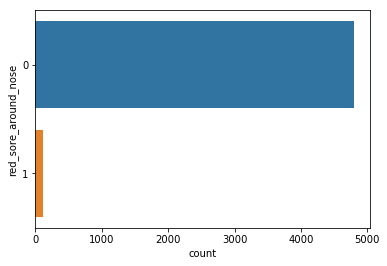

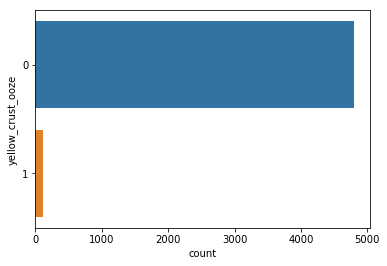

In [12]:
for i in df_sympt.columns:
    sns.countplot(y=df[i])
    plt.show()
    print("\n")

After seeing both in terms of percentage of counts and visually the frequency of the symptoms, we note that:
<br> - most of the symptoms are experienced by 10% or less of the patients
<br> - about 15% of the patients had yellowish skin or eyes, chills, skin rash or chest pain
<br> - around 20% of the patients experiences headache, joint pain, nausea (or loss of appetite) and abdominal pain
<br> - approximately 30% of patients had a fever
<br> - about 40% of patients experienced fatigue and vomit

Fluid overload is a symptom that no patients experienced, therefore we can remove that column.

In [13]:
df.drop(columns=['fluid_overload'], inplace=True)

Next we will do a bit of data manipulation to see these results visually in a more intuitive way:

In [14]:
# Creating a dataframe from the value counts of the symptoms
df_value_counts=df.apply(pd.Series.value_counts, axis=0).fillna(0)
# Dropping the prognosis from the dataframe
df_value_counts.drop('prognosis', axis=1, inplace=True)
# Transposing the dataframe
df_value_counts=df_value_counts.T

Now from this dataframe that contains the information on the counts of the symptoms, but also many extra columns we don't need, we will create a skim down version that has only the positive counts of symptoms that we are interested in.

In [15]:
df_counts= pd.DataFrame()
df_counts['counts']=df_value_counts.loc[:,1]
df_counts.reset_index(inplace=True)
df_counts.rename(columns={"index": "symptom"}, inplace=True)
df_counts['%']=df_counts['counts']/4920
df_counts.sort_values(by='counts', ascending=False, inplace=True)

In [16]:
df_counts

,symptom,counts,%
14,fatigue,1932.0,0.392683
11,vomiting,1914.0,0.389024
25,high_fever,1362.0,0.276829
35,loss_of_appetite,1152.0,0.234146
34,nausea,1146.0,0.232927
...,...,...,...
101,dischromic _patches,108.0,0.021951
74,extra_marital_contacts,108.0,0.021951
83,spinning_movements,108.0,0.021951
86,weakness_of_one_body_side,108.0,0.021951


Next we will plot this information both in the form of a bar graph and a pie chart.

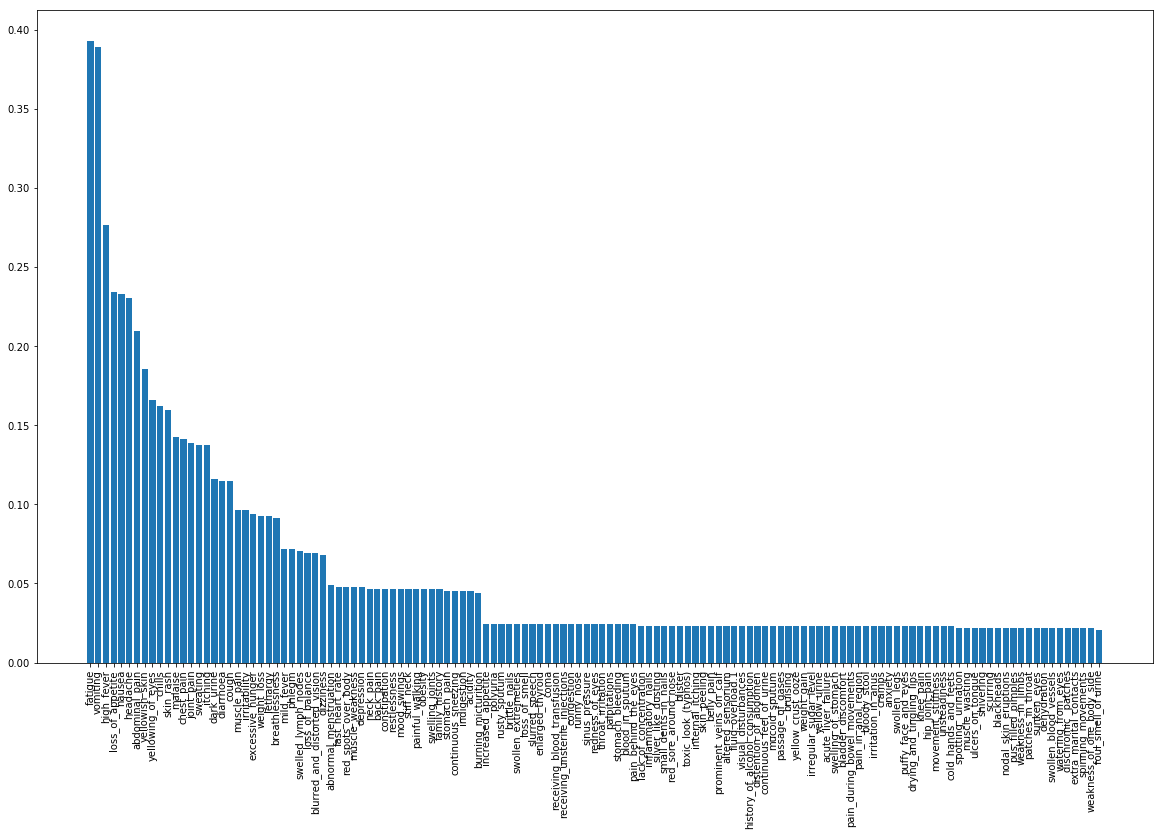

In [17]:
fig, ax = plt.subplots(figsize=(20,12))
plt.bar(df_counts['symptom'], df_counts['%'])
ax.set_xticklabels(labels=df_counts['symptom'], rotation='vertical')
plt.show();

In [18]:
"""fig, ax = plt.subplots(figsize=(20,20))
ax.pie(df_counts['%'], labels=df_counts['symptom'])
plt.show();
"""

"fig, ax = plt.subplots(figsize=(20,20))\nax.pie(df_counts['%'], labels=df_counts['symptom'])\nplt.show();\n"

As we can see we have a wide variety of symptoms and visualizing them all together is not necessarily enlightening.
<br> So next we will select only the top most frequent symptoms and focus on those.

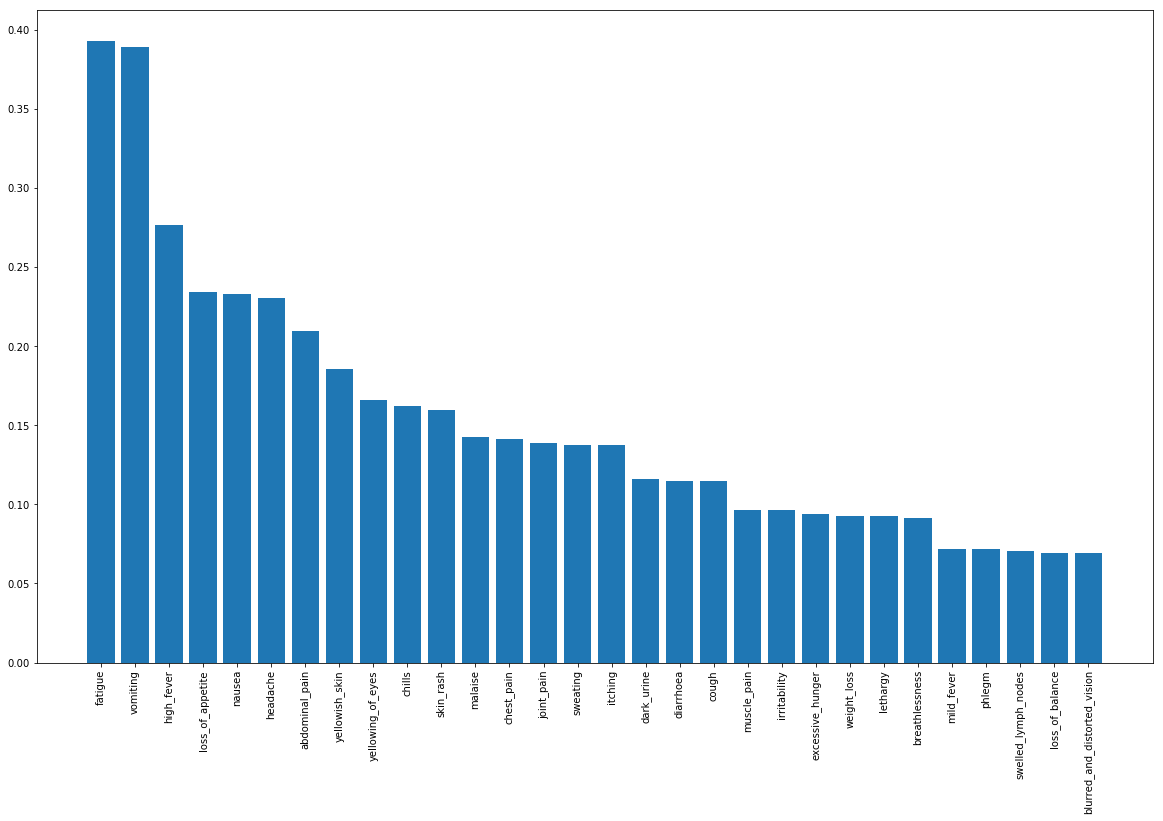

In [19]:
fig, ax = plt.subplots(figsize=(20,12))
plt.bar(df_counts['symptom'][0:30], df_counts['%'][0:30])
ax.set_xticklabels(labels=df_counts['symptom'], rotation='vertical')
plt.show();

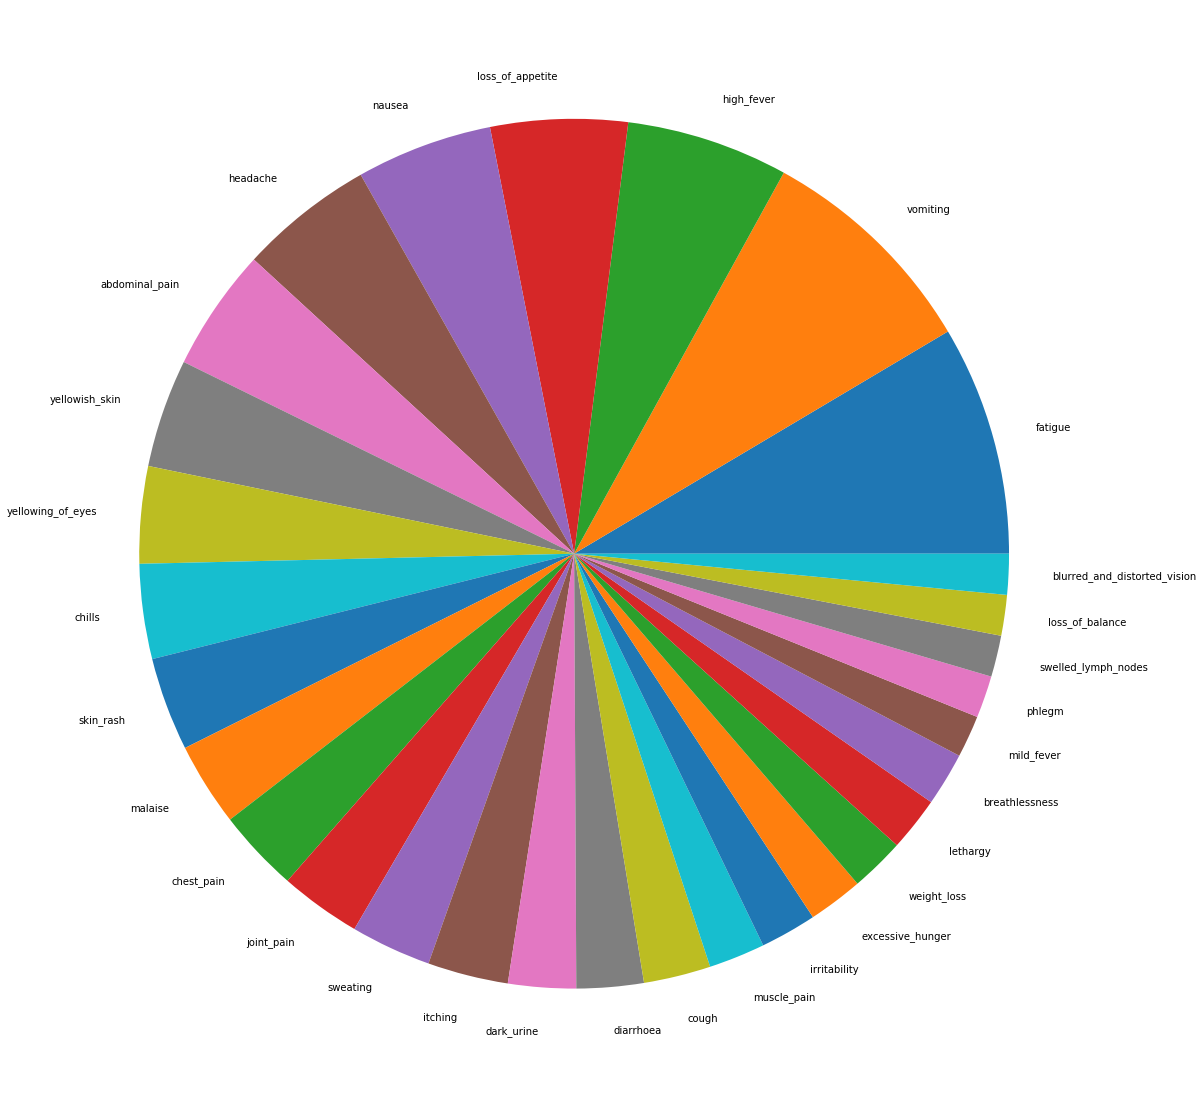

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
ax.pie(df_counts['counts'][0:30], labels=df_counts['symptom'][0:30])
#ax.set_xticklabels(labels=df_counts['symptom'], rotation='vertical')
plt.show();
#ax.pie(sizes, labels=labels)

We note once again the prevalence of the symptoms of fatigue, vomiting and high fever as the symptoms that at least 1 in 4 patients experienced.

#### The test:
<br> Next we will explore the test set:

In [21]:
df_test=pd.read_csv('Dataset/Testing.csv')

In [22]:
df_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


As we can see the test set is structured exactly like the training set, but with only 41 rows.
<br>Let's check the presence of null values:

In [23]:
df_test.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

No null values in this dataset.
<br>Moving again prognosis to the beginning of the DataFrame.

In [24]:
df_test.insert(0, 'prognosis', df_test.pop('prognosis'))
df_test

,prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allergy,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GERD,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Chronic cholestasis,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Drug Reaction,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Peptic ulcer diseae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Diabetes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Gastroenteritis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Bronchial Asthma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next let us explore the DataFrame:

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, prognosis to yellow_crust_ooze
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


Let us look at the distribution of the prognosis:

In [26]:
df_test['prognosis'].value_counts()

Fungal infection                           2
Gastroenteritis                            1
Diabetes                                   1
Paralysis (brain hemorrhage)               1
Impetigo                                   1
hepatitis A                                1
Hepatitis B                                1
Jaundice                                   1
Bronchial Asthma                           1
Alcoholic hepatitis                        1
Hepatitis E                                1
Psoriasis                                  1
Cervical spondylosis                       1
Hyperthyroidism                            1
Hypoglycemia                               1
Chronic cholestasis                        1
Varicose veins                             1
(vertigo) Paroymsal  Positional Vertigo    1
Osteoarthristis                            1
Dimorphic hemmorhoids(piles)               1
Chicken pox                                1
Migraine                                   1
Pneumonia 

We can see that also in the test the prognosis are distributed equally or almost, since every disease appears once except for fungal infection, which for some reason appears twice, and not with the same symptoms.
<br>We will keep an eye on this and see if later on it will give us some trouble but for now, it's good to see that all the other diseases are present in the same measure.

Moving on to studying the symptoms, we will again create a DataFrame with the counts and preview it as a bar graph.

In [27]:
# Creating a dataframe from the value counts of the symptoms
df_value_counts=df_test.apply(pd.Series.value_counts, axis=0).fillna(0)
# Dropping the prognosis from the dataframe
df_value_counts.drop('prognosis', axis=1, inplace=True)
# Transposing the dataframe
df_value_counts=df_value_counts.T

In [28]:
df_counts= pd.DataFrame()
df_counts['counts']=df_value_counts.loc[:,1]
df_counts.reset_index(inplace=True)
df_counts.rename(columns={"index": "symptom"}, inplace=True)
df_counts['%']=df_counts['counts']/4920
df_counts.sort_values(by='counts', ascending=False, inplace=True)

In [29]:
df_counts

,symptom,counts,%
11,vomiting,17.0,0.003455
14,fatigue,17.0,0.003455
25,high_fever,12.0,0.002439
35,loss_of_appetite,10.0,0.002033
34,nausea,10.0,0.002033
...,...,...,...
61,bloody_stool,1.0,0.000203
60,pain_in_anal_region,1.0,0.000203
59,pain_during_bowel_movements,1.0,0.000203
131,yellow_crust_ooze,1.0,0.000203


<br>We see again at the top of the list vomiting, fatigue and high fever, like in the train.
Also in the test nobody experienced fluid overload, we will remove it.

In [30]:
df_test.drop(columns=['fluid_overload'], inplace=True)
df_counts.drop([45], inplace=True)

Now we will plot the counts of all of the symptoms present in the test dataset:

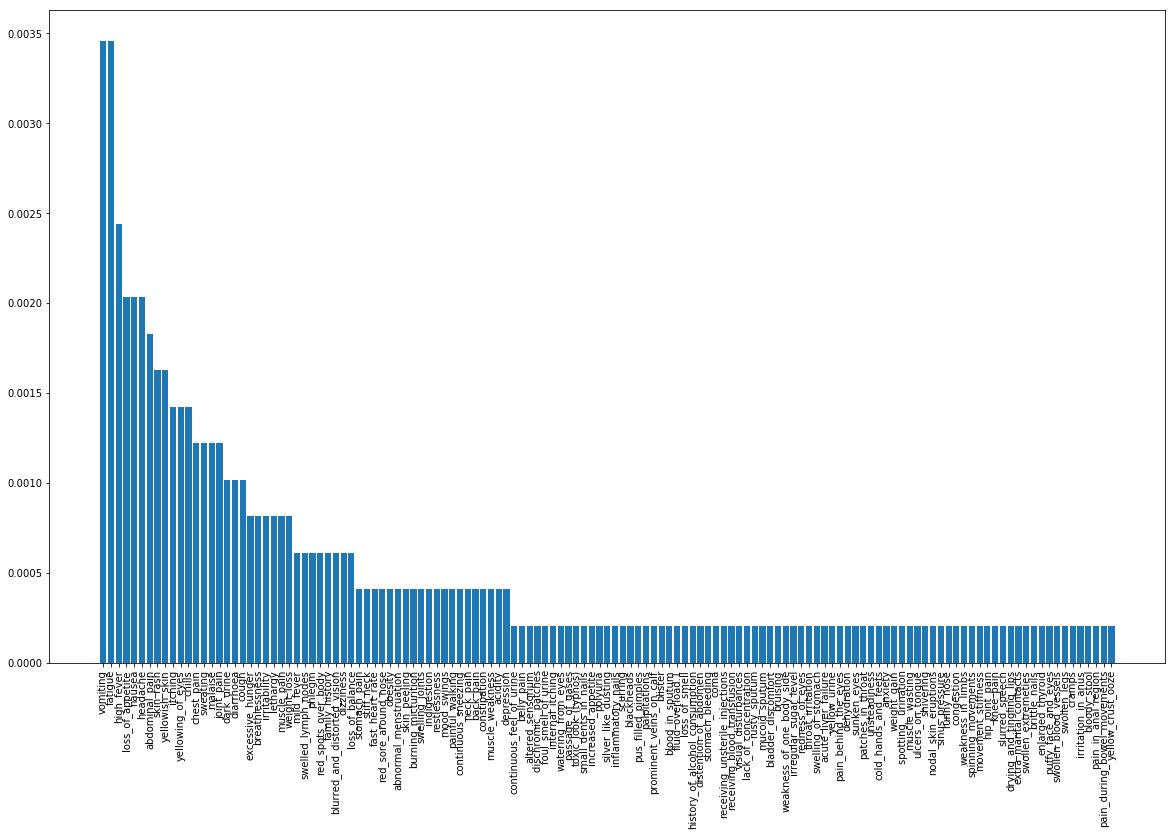

In [31]:
fig, ax = plt.subplots(figsize=(20,12))
plt.bar(df_counts['symptom'], df_counts['%'])
ax.set_xticklabels(labels=df_counts['symptom'], rotation='vertical')
plt.show();

Previewing only the top 30:

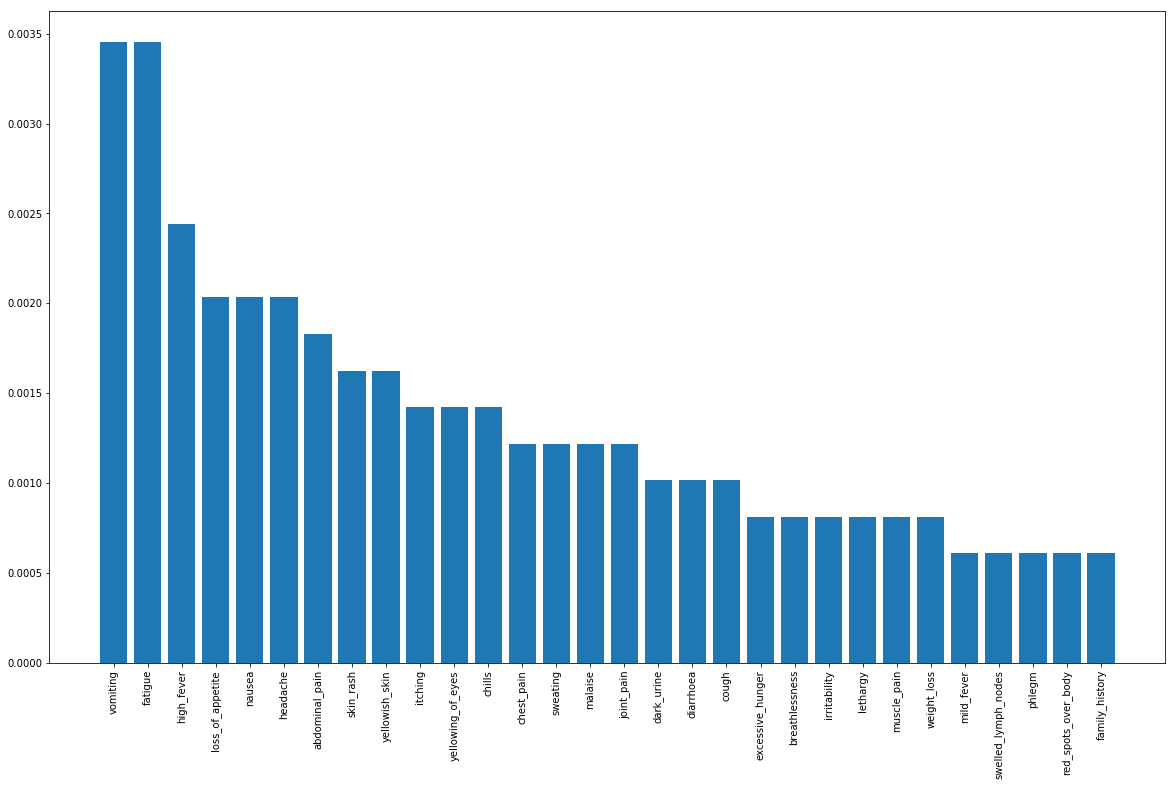

In [32]:
fig, ax = plt.subplots(figsize=(20,12))
plt.bar(df_counts['symptom'][0:30], df_counts['%'][0:30])
ax.set_xticklabels(labels=df_counts['symptom'], rotation='vertical')
plt.show();

We find a similar distribution of symptoms as the one we saw in the test, at least in the first 10 or so.

Our data is already all one hot encoded, therefore it doesn't need any scaling. It is also already balanced and divided into Train and Test set.
All we have left to do is identify our X and y and we can start to build some models.

In [33]:
X_train=df.drop(['prognosis'], axis=1)

In [34]:
y_train=df['prognosis']
y_train

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

I actually don't like it like this very much so I'm going to use a label encoder to transform these categorical values into numerical values:

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x = df['prognosis']
y_train = label_encoder.fit_transform(x)
print(y_train)

[15 15 15 ... 38 35 27]


In [36]:
len(y_train)

4920

Perfect. Now we will repeat the same for the test, so we have everything ready.

In [37]:
X_test=df_test.drop(['prognosis'], axis=1)

In [38]:
label_encoder = LabelEncoder()
x = df_test['prognosis']
y_test = label_encoder.fit_transform(x)
print(y_test)

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 15]


### Models:
As the first model we will use a basic Logistic Regression and we will keep it as our base or naive model:

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [41]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  1.0


In [42]:
from sklearn import metrics
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp
    
def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn
    
def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp
    
def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn
def precision(y_test, y_pred):
    tp =true_positive(y_test, y_pred)
    fp = false_positive(y_test, y_pred)
    try:
        return(tp/(tp+fp))
    except ZeroDivisionError:
        return 0
def Macro_averaged_precision(y_test, predictions):
    precisions = []
    for i in range(1,5):
        temp_ytest = [1 if x == i else 0 for x in y_test]
        temp_ypred = [1 if x == i else 0 for x in predictions]
#       print(temp_ypred)
#       print(temp_ytest)
        prec = precision(temp_ytest, temp_ypred)
        precisions.append(prec)
    
    return (sum(precisions)/len(precisions))
         
def Micro_averaged_precision(y_test, predictions):
    tp = 0
    fp = 0
    for i in range(1,5):
        temp_ytest = [1 if x == i else 0 for x in y_test]
        temp_ypred = [1 if x == i else 0 for x in predictions]
        tp += true_positive(temp_ytest, temp_ypred)
        fp += false_positive(temp_ytest, temp_ypred)
    precisions = tp / (tp + fp)
    return precisions
def weighted_precision(y_test, predictions):
    num_classes = len(np.unique(y_test))
    #coutns for every class
    precision = 0
    for i in range(1, num_classes):
        temp_ytest = [1 if x == i else 0 for x in y_test]
        temp_ypred = [1 if x == i else 0 for x in predictions]
        tp = true_positive(temp_ytest, temp_ypred)
        fp = false_positive(temp_ytest, temp_ypred)
        
        try:
            preai = tp / (tp+fp)
        except ZeroDivisionError:
            preai = 0
        weighted = preai*sum(temp_ytest)
        precision += weighted
    precision = precision/len(y_test)
    return precision


In [43]:
print("Macro precision is:", Macro_averaged_precision(y_test, predictions))
print("Micro precision is:", Micro_averaged_precision(y_test, predictions))
print("Weighted precision is:", weighted_precision(y_test, predictions))
print("sklearn Macro", metrics.precision_score(y_test, predictions, average = "macro"))
print("sklearn Micro", metrics.precision_score(y_test, predictions, average = "micro"))
print("sklearn weighted", metrics.precision_score(y_test, predictions, average = "weighted"))


Macro precision is: 1.0
Micro precision is: 1.0
Weighted precision is: 0.9761904761904762
sklearn Macro 1.0
sklearn Micro 1.0
sklearn weighted 1.0


Let us now explore the recall:

In [44]:
def recall(y_test, y_pred):
    tp = true_positive(y_test, y_pred)
    fn = false_negative(y_test, y_pred)
    return(tp/(tp+fn))
def Macro_averaged_recall(y_test, predictions):
    recalls = []
    for i in range(1,5):
        temp_ytest = [1 if x == i else 0 for x in y_test]
        temp_ypred = [1 if x == i else 0 for x in predictions]
#        print(temp_ypred)
#        print(temp_ytest)
        rec = recall(temp_ytest, temp_ypred)
        recalls.append(rec)
    
    return (sum(recalls)/len(recalls))
         
def Micro_averaged_recall(y_test, predictions):
    tp = 0
    tn = 0
    for i in range(1,5):
        temp_ytest = [1 if x == i else 0 for x in y_test]
        temp_ypred = [1 if x == i else 0 for x in predictions]
        tp += true_positive(temp_ytest, temp_ypred)
        tn += true_negative(temp_ytest, temp_ypred)
    recall = tp / (tp + tn)
    return recall

def weighted_recall(y_test, predictions):
    num_classes = len(np.unique(y_test))
    #counts for every class
    recall = 0
    for i in range(1, num_classes):
        temp_ytest = [1 if x == i else 0 for x in y_test]
        temp_ypred = [1 if x == i else 0 for x in predictions]

        tp = true_positive(temp_ytest, temp_ypred)
        tn = true_negative(temp_ytest, temp_ypred)
        
        try:
            rec = tp / (tp+tn)
        except ZeroDivisionError:
            rec = 0
        weighted = rec*sum(temp_ytest)
        recall += weighted
    recall = recall/len(y_test)
    return recall

In [45]:
print("Macro recall is:", Macro_averaged_recall(y_test, predictions))
print("Micro recall is:", Micro_averaged_recall(y_test, predictions))
print("Weighted recall is:", weighted_recall(y_test, predictions))
print("sklearn Macro", metrics.recall_score(y_test, predictions, average = "macro"))
print("sklearn Micro", metrics.recall_score(y_test, predictions, average = "micro"))
print("sklearn weighted", metrics.recall_score(y_test, predictions, average = "weighted"))

Macro recall is: 1.0
Micro recall is: 0.023809523809523808
Weighted recall is: 0.024376417233560106
sklearn Macro 1.0
sklearn Micro 1.0
sklearn weighted 1.0


Next we will use a basic decision tree:

In [46]:
#Create the tree
DT1 = DecisionTreeClassifier(criterion='entropy', random_state=19)

In [47]:
# fit the tree
DT1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=19)

We will have the tree make predictions:

In [48]:
# Make predictions
predictions = DT1.predict(X_test)

previewing the predictions:

In [49]:
predictions

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

Let us take a look at the accurcay of the prediction:

In [50]:
('Accuracy: ', accuracy_score(y_test, predictions))

('Accuracy: ', 1.0)

In [51]:
print("Macro precision is:", Macro_averaged_precision(y_test, predictions))
print("Micro precision is:", Micro_averaged_precision(y_test, predictions))
print("Weighted precision is:", weighted_precision(y_test, predictions))
print("sklearn Macro", metrics.precision_score(y_test, predictions, average = "macro"))
print("sklearn Micro", metrics.precision_score(y_test, predictions, average = "micro"))
print("sklearn weighted", metrics.precision_score(y_test, predictions, average = "weighted"))

Macro precision is: 1.0
Micro precision is: 1.0
Weighted precision is: 0.9761904761904762
sklearn Macro 1.0
sklearn Micro 1.0
sklearn weighted 1.0


In [52]:
print("Macro recall is:", Macro_averaged_recall(y_test, predictions))
print("Micro recall is:", Micro_averaged_recall(y_test, predictions))
print("Weighted recall is:", weighted_recall(y_test, predictions))
print("sklearn Macro", metrics.recall_score(y_test, predictions, average = "macro"))
print("sklearn Micro", metrics.recall_score(y_test, predictions, average = "micro"))
print("sklearn weighted", metrics.recall_score(y_test, predictions, average = "weighted"))

Macro recall is: 1.0
Micro recall is: 0.023809523809523808
Weighted recall is: 0.024376417233560106
sklearn Macro 1.0
sklearn Micro 1.0
sklearn weighted 1.0


These very high accuracies with the most basic models are suspicious.
I am going to analyze more in depth the test set to see if there are too few cases there, or if any of the cases are identical to the ones in the train, which would explain the high accuracy.


In [53]:
df_testT=np.transpose(df_test)
df_testT

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
prognosis,Fungal infection,Allergy,GERD,Chronic cholestasis,Drug Reaction,Peptic ulcer diseae,AIDS,Diabetes,Gastroenteritis,Bronchial Asthma,...,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo,Fungal infection
itching,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
skin_rash,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
nodal_skin_eruptions,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
continuous_sneezing,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
inflammatory_nails,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
blister,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
red_sore_around_nose,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [54]:
df_testT[0]

prognosis               Fungal infection
itching                                1
skin_rash                              1
nodal_skin_eruptions                   1
continuous_sneezing                    0
                              ...       
small_dents_in_nails                   0
inflammatory_nails                     0
blister                                0
red_sore_around_nose                   0
yellow_crust_ooze                      0
Name: 0, Length: 132, dtype: object

In [55]:
rslt_df = df_testT.loc[(df_testT[0] == 1)]

In [56]:
rslt_df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
itching,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
skin_rash,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
nodal_skin_eruptions,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dischromic _patches,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So we have isolated the symptoms of the one patient with fungal infection in the test.
Let us see the symptoms of patients with the same prognosis in the train.

In [57]:
dfT=np.transpose(df)
dfT

,0,1,2,3,4,5,6,7,8,9,...,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919
prognosis,Fungal infection,Fungal infection,Fungal infection,Fungal infection,Fungal infection,Fungal infection,Fungal infection,Fungal infection,Fungal infection,Fungal infection,...,Hypothyroidism,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo
itching,1,0,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
skin_rash,1,1,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,1,0,1,1
nodal_skin_eruptions,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
continuous_sneezing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
inflammatory_nails,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
blister,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
red_sore_around_nose,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
rslt_df = dfT.loc[(dfT[0] == 1)]
rslt_df

,0,1,2,3,4,5,6,7,8,9,...,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919
itching,1,0,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
skin_rash,1,1,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,1,0,1,1
nodal_skin_eruptions,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
dischromic _patches,1,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
rslt_df = dfT.loc[(dfT[121] == 1)]
rslt_df

,0,1,2,3,4,5,6,7,8,9,...,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919
back_pain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
weakness_in_limbs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neck_pain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
dizziness,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
loss_of_balance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [60]:
dfT[10]

prognosis               Allergy
itching                       0
skin_rash                     0
nodal_skin_eruptions          0
continuous_sneezing           1
                         ...   
small_dents_in_nails          0
inflammatory_nails            0
blister                       0
red_sore_around_nose          0
yellow_crust_ooze             0
Name: 10, Length: 132, dtype: object

Next we are going to try to make a validation split, with a bigger sample, to see if with a larger test set the accuracy decreases. If it does than clearly the problem is just the test set being too small, and that can be an easy fix.

### Creating validation set

Since we have a test set that is very small that might be the cause of our high precision with a very simple model.
<br>We will perform a split creating a validation set from the train and run our models again and see if something changes with the results.

In this case for us the whole X is the train and the whole y is the train y. So let us define that.

In [63]:
X=X_train
y=y_train

Next we will proceed with the split. We want our holdout validation set to be 25% of the train.

In [64]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)

Now let us run the models again, fitting them on the (smaller) train set and predicting on the validation.

In [61]:
sympt_counts = df['prognosis'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']

fig = px.pie(disease_counts, 
             values= 'Count', 
             names= 'Disease', 
             color_discrete_sequence= px.colors.sequential.Reds_r, 
             title= 'Disease Distribution')

fig.update_traces(textinfo='percent+label')

fig.show()

NameError: name 'disease_counts' is not defined